# BepiColombo PWI EFD Spec: L1a QL -- 2025/7/25

In [21]:
import copy
import datetime
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from spacepy import pycdf

In [22]:
sys.path.append('./lib/')
import Bepi_PWI_EFD_spec_data as bepi_data
import Bepi_PWI_EFD_spec_lib  as bepi_spec
# import Bepi_PWI_EFD_cal_lib  as bepi_cal

# parameter set -- to be modified

In [23]:
# *** Dump ***
dump_mode = 1                           # 0: no-dump  1:plot dump

# *** CAL ***
unit_mode = 1                           # [Power]     0: RAW    1: V    2: V/m
band_mode = 0                           # [Power]     0: sum    1: /Hz
cal_mode  = 2                           # [Power]     0: background     1: CAL     2: all

# *** Unit ***
f_mode    = 1                           # [Frequency] 0: linear  1: log
time_mode = 0                           # [Time]      0: Epoch   1: data number
gap_mode  = 1                           # [gap]       0: n/a     1: gap

# *** Power range set ***
p_raw_max = +5.0                        # background: 7.5   CAL: 10
p_raw_min = -4.0                        # background: 2.5   CAL: 5

# *** Directory set: set by User ***
work_dir = '/Users/user/0-python/Bepi_python/ql/'   # Plot dump folder

# get CDF data

In [24]:
mode_cdf = 0        # 0:flight  1:test
mode_tlm = 'l'      # l, m, h
mode_L   = 0        # 0:ave     1:peak

# date = '0'          # from Data list in Bepi_PWI_EFD_sec_data.py
# TEST
# date = '2025060?'
date = '20250605'
# date = '20250606'
# date = '20250625'

# Flight -- only 'l'
# date='20250410'
# date='20240409'
# date='20231106'
date='20231026'           # WPT: CAL
# date='20230730'
# date='20230522'
# date='20230228'           # WPT: CAL
# date='20221107'
# date='20220517'
# date='20220311'
# date='20211124'
# date='20210617'
# date='20201217'
# date='20200304'
# date='20190630'
# date='2018080?'           # WPT latch release
# date='20190807'           # WPT latch release
# date='20190806'           # WPT latch release
# date='20190805'           # WPT precheck
# date='20190802'           # WPT precheck
# date='20190701'           # WPT detailed check
# date='20190515'
# date='201811[0-1][9,0]'   # Init check
# date='20181111'           # Init check
# date='20181110'           # Init check
# date='20181109'           # Init check

data_dir, data_list = bepi_data.datalist(date, mode_tlm, mode_cdf)       # [date]   yyyymmdd: group read    others: file list

/Users/user/D-Univ/data/data-Mio/cdf/EFD/L1/2023/bc_mmo_pwi-efd_l1_l-spec_20231026*.cdf
/Users/user/D-Univ/data/data-Mio/cdf/EFD/L1/2023/
['bc_mmo_pwi-efd_l1_l-spec_20231026_r01-v00-00.cdf']


In [25]:
class struct:
    pass
data = struct()
num_list = len(data_list)
for i in range(num_list):
    data_name = data_list[i];  cdf_file = data_dir + data_name
    cdf = pycdf.CDF(cdf_file);    data1 = bepi_spec.efd_spec_read(cdf, mode_tlm, mode_L)
    if i==0: data = data1;                               
    else:    data = bepi_spec.efd_spec_add(data, data1)
    print(i, data.EuEu.shape, cdf_file)
data_name = os.path.split(data_name)[1];            print("data name:", data_name)

0 (500, 16) /Users/user/D-Univ/data/data-Mio/cdf/EFD/L1/2023/bc_mmo_pwi-efd_l1_l-spec_20231026_r01-v00-00.cdf
data name: bc_mmo_pwi-efd_l1_l-spec_20231026_r01-v00-00.cdf


In [26]:
data = bepi_spec.efd_spec_shaping(data, cal_mode)
data.freq   = data.spec_freq
data.freq_w = data.spec_width

In [27]:
print(" data.EuEu(,ch) [V]:", data.EuEu.shape,    data.EuEu[0][0],          data.EuEu[-1][-1])
print(" data.EvEv(,ch) [V]:", data.EvEv.shape,    data.EvEv[0][0],          data.EvEv[-1][-1])
print("     data.spec_freq:", data.spec_freq.shape,     "\t", data.spec_freq[0],        data.spec_freq[-1])
print("    data.spec_width:", data.spec_width.shape,    "\t", data.spec_width[0],       data.spec_width[-1])
print("    data.EFD_Eu_ENA:", data.EFD_Eu_ENA.shape,    "\t", data.EFD_Eu_ENA[0],       data.EFD_Eu_ENA[-1])
print("    data.EFD_Ev_ENA:", data.EFD_Ev_ENA.shape,    "\t", data.EFD_Ev_ENA[0],       data.EFD_Ev_ENA[-1])
print("     data.EFD_Hdump:", data.EFD_Hdump.shape,     "\t", data.EFD_Hdump[0],        data.EFD_Hdump[-1])
print("data.EFD_saturation:", data.EFD_saturation.shape,"\t", data.EFD_saturation[0],   data.EFD_saturation[-1])
print("  data.EFD_spinrate:", data.EFD_spinrate.shape,  "\t", data.EFD_spinrate[0],     data.EFD_spinrate[-1])
print(" data.EFD_spinphase:", data.EFD_spinphase.shape, "\t", data.EFD_spinphase[0],    data.EFD_spinphase[-1])
print("     data.EFD_sweep:", data.EFD_sweep.shape,     "\t", data.EFD_sweep[0],        data.EFD_sweep[-1])
print("     data.PRE_U_PWR:", data.PRE_U_PWR.shape,     "\t", data.PRE_U_PWR[0],        data.PRE_U_PWR[-1])
print("     data.PRE_V_PWR:", data.PRE_V_PWR.shape,     "\t", data.PRE_V_PWR[0],        data.PRE_V_PWR[-1])
print("     data.PRE_U_CAL:", data.PRE_U_CAL.shape,     "\t", data.PRE_U_CAL[0],        data.PRE_U_CAL[-1])
print("     data.PRE_V_CAL:", data.PRE_V_CAL.shape,     "\t", data.PRE_V_CAL[0],        data.PRE_V_CAL[-1])
print("    data.PRE_U_LOOP:", data.PRE_U_LOOP.shape,    "\t", data.PRE_U_LOOP[0],       data.PRE_U_LOOP[-1])
print("      data.AM2P_ENA:", data.AM2P_ENA.shape,      "\t", data.AM2P_ENA[0],         data.AM2P_ENA[-1])
print("         data.epoch:", data.epoch.shape,         "\t", data.epoch[0],            data.epoch[-1])
print("        data.EFD_TI:", data.EFD_TI.shape,        "\t", '{:X}'.format(data.EFD_TI[0]), '{:X}'.format(data.EFD_TI[-1]))

 data.EuEu(,ch) [V]: (500, 16) 0.0050118724 0.0005623413
 data.EvEv(,ch) [V]: (500, 16) nan 0.001
     data.spec_freq: (16,) 	 1.5 38.5
    data.spec_width: (16,) 	 2.0 4.0
    data.EFD_Eu_ENA: (500,) 	 1 0
    data.EFD_Ev_ENA: (500,) 	 1 0
     data.EFD_Hdump: (500,) 	 0 0
data.EFD_saturation: (500,) 	 1 0
  data.EFD_spinrate: (500,) 	 4.136 4.136
 data.EFD_spinphase: (500,) 	 118.52031 118.52031
     data.EFD_sweep: (500,) 	 0 1
     data.PRE_U_PWR: (500,) 	 1 0
     data.PRE_V_PWR: (500,) 	 1 0
     data.PRE_U_CAL: (500,) 	 0 0
     data.PRE_V_CAL: (500,) 	 0 0
    data.PRE_U_LOOP: (500,) 	 0 0
      data.AM2P_ENA: (500,) 	 0 0
         data.epoch: (500,) 	 2023-10-26 12:42:19.156250 2023-10-26 15:12:22.875000
        data.EFD_TI: (500,) 	 13A000 59FA00


In [28]:
date1 = data.epoch[0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
date2 = data.epoch[-1]; date2 = date2.strftime('%Y/%m/%d %R:%S')
str_date = date1 + "  -  " + date2
n_time0 = data.n_time;  n_freq0 = data.n_freq
f_min0  = data.freq[0]; f_max0  = data.freq[-1]

if data.n_time>1: 
    print("    Epoch:", str_date, "(interval:", data.epoch[1] - data.epoch[0], data.epoch[-1] - data.epoch[-2], ")")
else:
    print("    Epoch:", str_date)
print("  Samples:", n_time0)
print("Frequency:", n_freq0, "\t[", f_min0,  "-", f_max0, "(Hz)]")
print("    (step)", data.freq_w)

    Epoch: 2023/10/26 12:42:19  -  2023/10/26 15:12:22 (interval: 0:00:16.531250 0:00:16.562500 )
  Samples: 500
Frequency: 16 	[ 1.5 - 38.5 (Hz)]
    (step) [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 4.]


# Spectrum Data

In [29]:
spec = copy.deepcopy(data)

In [30]:
Epoch_1d  = spec.epoch.tolist();    n_time1 = spec.EuEu.shape[0]; num_1d = np.arange(n_time1)
freq_1d   = spec.freq;              freq_w_1d = spec.freq_w
n_freq1   = freq_1d.shape[0];       f_min0 = freq_1d[0];                f_max0  = freq_1d[-1]

In [31]:
# spec = bepi_cal.spec_cal(spec)     # CAL
spec.cf       = 0.0
spec.str_unit = "V2"

### Peak

In [32]:
bepi_spec.spec_peak(spec, n_time0)

[ All   Peak] <Eu> +8.91e-03  3.5 Hz 	<Ev> +7.94e-02  1.5 Hz
[     0 peak] <Eu> +5.01e-03  1.5 Hz 	<Ev> +nan  nan Hz
[   250 peak] <Eu> +5.62e-03  1.5 Hz 	<Ev> +2.82e-04  1.5 Hz
[   499 peak] <Eu> +8.91e-04  3.5 Hz 	<Ev> +1.78e-03 11.5 Hz


In [33]:
p_max0 = p_raw_max + spec.cf/10;  p_min0 = p_raw_min + spec.cf/10
p_max  = np.ceil(np.log10( np.nanmax( [np.nanmax(spec.EuEu), np.nanmax(spec.EvEv)] ) )*5)/5+.5
p_min  = np.ceil(np.log10( np.nanmin( [np.nanmin(spec.EuEu), np.nanmin(spec.EvEv)] ) )*5)/5-.5
print("MAX-min:", '{:.1f}'.format(p_max), '({:.1e})'.format(10**p_max0), '{:.1f}'.format(p_min), '({:.1e})'.format(10**p_min0))
print("conversion factor:", '{:.1f}'.format(spec.cf), "    MAX-min:", '{:.1f}'.format(p_max), '({:.1f})'.format(p_max0), '{:.1f}'.format(p_min), '({:.1f})'.format(p_min0), "   str_unit:", spec.str_unit)

MAX-min: -0.5 (1.0e+05) -3.9 (1.0e-04)
conversion factor: 0.0     MAX-min: -0.5 (5.0) -3.9 (-4.0)    str_unit: V2


In [34]:
if mode_tlm=='m':
    str_Eu     = 'EuEu (M)';        str_Ev = 'EvEv (M)';        str_EE     = 'EE (M)'
elif mode_tlm=='l':
    if mode_L==0:
        str_Eu = 'EuEu ave (L)';    str_Ev = 'EvEv ave (L)';    str_EE     = 'EE ave (L)'
    else:
        str_Eu = 'EuEu peak (L)';   str_Ev = 'EvEv peak (L)';   str_EE     = 'EE peak (L)'

In [35]:
# NAN
if gap_mode == 1 and time_mode == 0:
    for i in range(n_time1-1):
        dt = spec.epoch[i+1] - spec.epoch[i]
        if dt.total_seconds() > 60:  bepi_spec.spec_nan(spec, i)
spec.EE   = spec.EuEu + spec.EvEv

[gap] 0:04:41.375000 79 2023-10-26 13:07:24.500000 80 2023-10-26 13:12:05.875000
[gap] 0:03:02.125000 483 2023-10-26 15:03:16.625000 484 2023-10-26 15:06:18.750000
[gap] 0:01:55.875000 484 2023-10-26 15:06:18.750000 485 2023-10-26 15:08:14.625000


### Spectrum plot -- ALL

[-0.5, 7999.5]
[-0.5, 499.5]


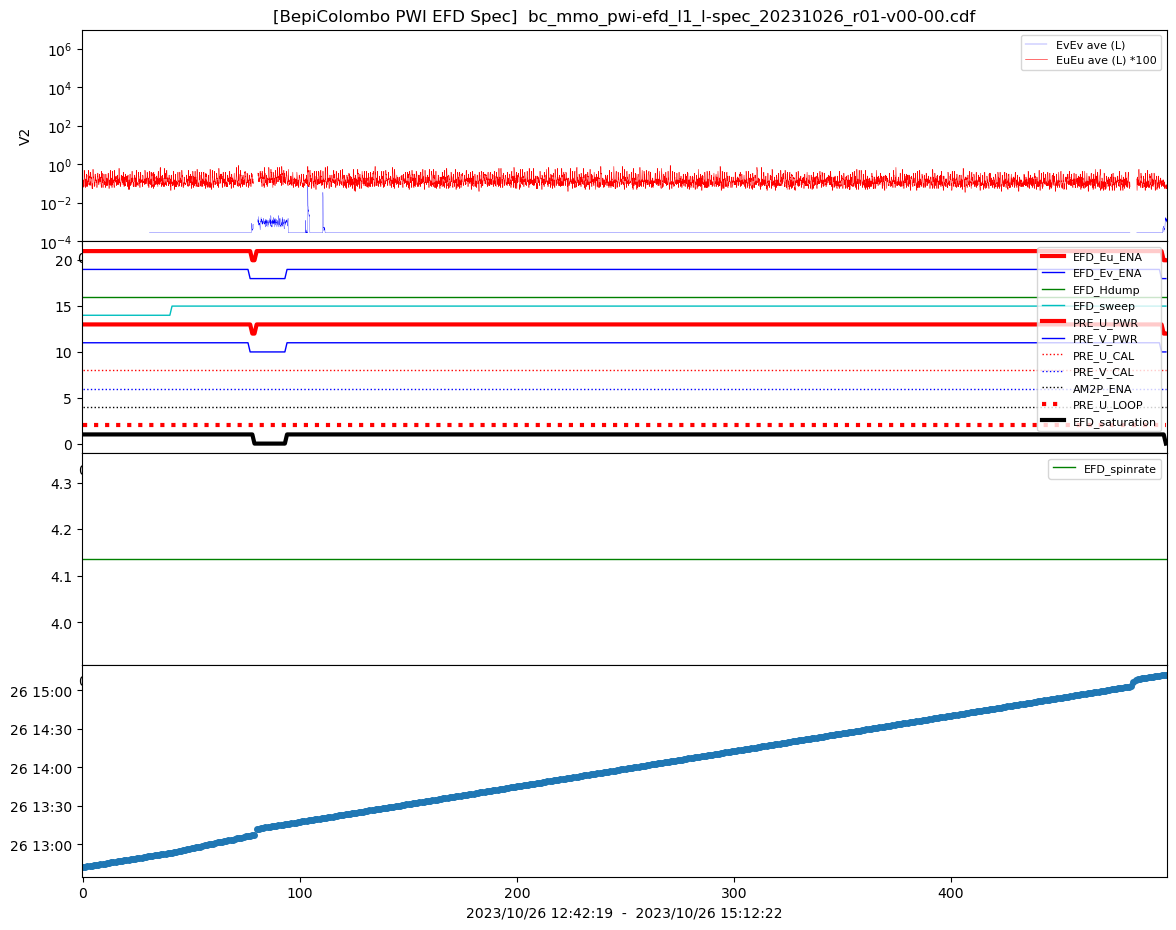

In [36]:
p_max  = p_max0+2;    p_min  = p_min0

fig = plt.figure(figsize=(14, 11))
ax1 = fig.add_subplot(4, 1, 1);  ax2 = fig.add_subplot(4, 1, 2);  ax3 = fig.add_subplot(4, 1, 3);  ax4 = fig.add_subplot(4, 1, 4)

ax1.plot(np.ravel(spec.EvEv),         '-b', linewidth=0.2, label=str_Ev)
ax1.plot(np.ravel(spec.EuEu)*100,     '-r', linewidth=0.4, label=str_Eu + ' *100')
ax1.set_yscale('log')
#
ax2.plot(np.ravel(data.EFD_Eu_ENA)     +20, '-r', linewidth=3.0, label='EFD_Eu_ENA')        # ???
ax2.plot(np.ravel(data.EFD_Ev_ENA)     +18, '-b', linewidth=1.0, label='EFD_Ev_ENA')
ax2.plot(np.ravel(data.EFD_Hdump)      +16, '-g', linewidth=1.0, label='EFD_Hdump')
ax2.plot(np.ravel(data.EFD_sweep)      +14, '-c', linewidth=1.0, label='EFD_sweep')
ax2.plot(np.ravel(data.PRE_U_PWR)      +12, '-r', linewidth=3.0, label='PRE_U_PWR')         # ???
ax2.plot(np.ravel(data.PRE_V_PWR)      +10, '-b', linewidth=1.0, label='PRE_V_PWR')
ax2.plot(np.ravel(data.PRE_U_CAL)       +8, ':r', linewidth=1.0, label='PRE_U_CAL')
ax2.plot(np.ravel(data.PRE_V_CAL)       +6, ':b', linewidth=1.0, label='PRE_V_CAL')
ax2.plot(np.ravel(data.AM2P_ENA)        +4, ':k', linewidth=1.0, label='AM2P_ENA')
ax2.plot(np.ravel(data.PRE_U_LOOP)      +2,  ':r', linewidth=3.0, label='PRE_U_LOOP')        # ???
ax2.plot(np.ravel(data.EFD_saturation),     '-k', linewidth=3.0, label='EFD_saturation')    # ???

ax3.plot(np.ravel(data.EFD_spinrate),       '-g', linewidth=1.0, label='EFD_spinrate')
# ax3.plot(np.ravel(data.EFD_spinphase),      '-r', linewidth=1.0, label='EFD_spinphase')
#
ax4.plot(np.ravel(data.epoch),               '.', markersize=8)

ax1.set_ylabel(spec.str_unit)
ax4.set_xlabel(str_date)
#
title_label = '[BepiColombo PWI EFD Spec]  ' + data_name;  ax1.set_title(title_label)
ax1.legend(loc='upper right', fontsize=8);  ax2.legend(loc='upper right', fontsize=8);  ax3.legend(loc='upper right', fontsize=8)

xlim=[-.5, len(np.ravel(data.EuEu)) -.5]; print(xlim); ax1.set_xlim(xlim)
xlim=[-.5, len(np.ravel(data.epoch))-.5];       print(xlim); ax2.set_xlim(xlim); ax3.set_xlim(xlim); ax4.set_xlim(xlim)
ylim=[10**p_min, 10**p_max];                    ax1.set_ylim(ylim)

fig.subplots_adjust(hspace=0);  fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_raw.png'
    fig.savefig(png_fname)

### FT Plot data

In [37]:
EuEu_2d = spec.EuEu.transpose();  EuEu_med = np.nanmedian(spec.EuEu, axis=0)
EvEv_2d = spec.EvEv.transpose();  EvEv_med = np.nanmedian(spec.EvEv, axis=0)
EE_2d   = spec.EE.transpose();          EE_med   = np.nanmedian(spec.EE,         axis=0)

## Spec

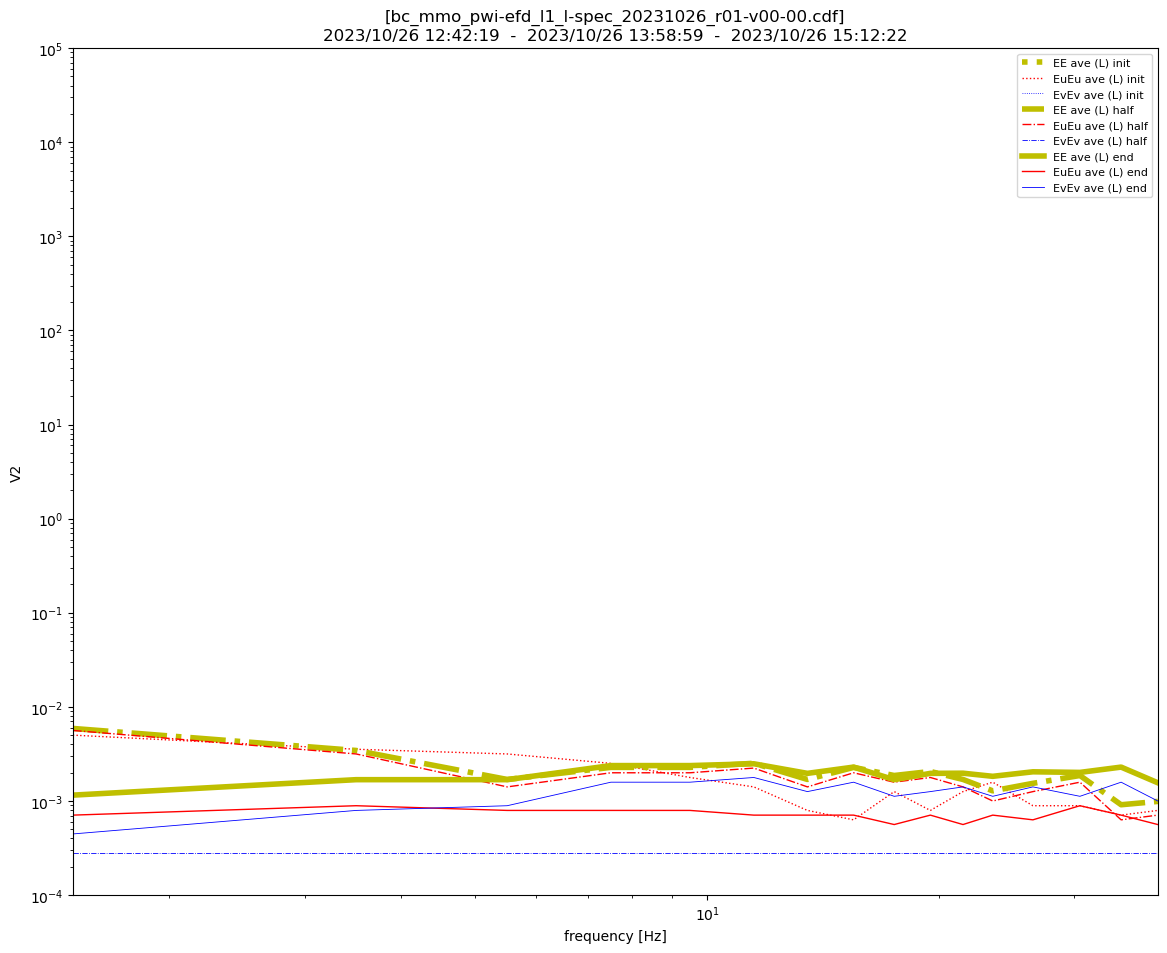

In [38]:
n0 = 0;  n1 = n_time0//2;  n2 = n_time0-1
p_min = p_min0;  p_max = p_max0
f_min = f_min0;  f_max = f_max0

fig = plt.figure(figsize=(14, 11))
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(freq_1d, spec.EE        [n0], ':y',  linewidth=4.0, label=str_EE +' init')
ax1.plot(freq_1d, spec.EuEu[n0], ':r',  linewidth=1.0, label=str_Eu +' init')
ax1.plot(freq_1d, spec.EvEv[n0], ':b',  linewidth=0.6, label=str_Ev +' init')
ax1.plot(freq_1d, spec.EE        [n1], '-.y', linewidth=4.0, label=str_EE +' half')
ax1.plot(freq_1d, spec.EuEu[n1], '-.r', linewidth=1.0, label=str_Eu +' half')
ax1.plot(freq_1d, spec.EvEv[n1], '-.b', linewidth=0.6, label=str_Ev +' half')
ax1.plot(freq_1d, spec.EE        [n2], '-y',  linewidth=4.0, label=str_EE +' end')
ax1.plot(freq_1d, spec.EuEu[n2], '-r',  linewidth=1.0, label=str_Eu +' end')
ax1.plot(freq_1d, spec.EvEv[n2], '-b',  linewidth=0.6, label=str_Ev +' end')
ax1.set_yscale('log')
if f_mode == 1: ax1.set_xscale('log')

ax1.set_xlabel('frequency [Hz]')
ax1.set_ylabel(spec.str_unit)

date1 = data.epoch[n0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
date2 = data.epoch[n1];  date2 = date2.strftime('%Y/%m/%d %R:%S')
date3 = data.epoch[n2];  date3 = date3.strftime('%Y/%m/%d %R:%S')
title_date = "[" + data_name + "]\n" + date1 + "  -  " + date2 + "  -  " + date3;  ax1.set_title(title_date)
ax1.legend(loc='upper right', fontsize=8)

xlim=[f_min, f_max];  ax1.set_xlim(xlim)
ylim=[10**p_min, 10**p_max]; ax1.set_ylim(ylim)

fig.subplots_adjust(hspace=0);  fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_spec.png'
    if f_mode == 1:
        png_fname = work_dir+data_name+'_spec-log.png'
    fig.savefig(png_fname)

## FT

( 0 ) 2023-10-26 12:42:19.156250 - ( 499 ) 2023-10-26 15:12:22.875000


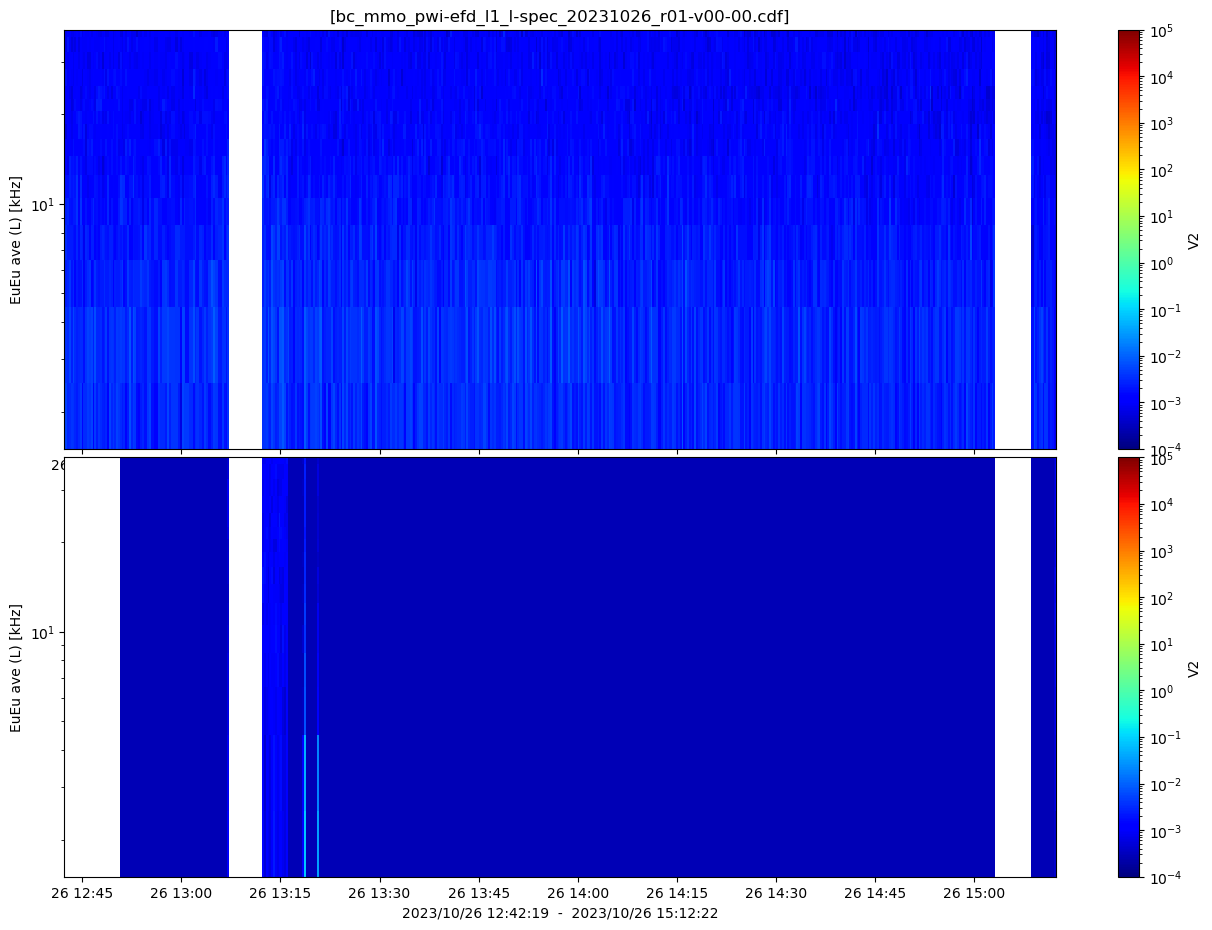

In [39]:
n0    = 0;              n1     = n_time0
# n0    = n_time0//10;    n1     = n_time0//6
p_min = p_min0;  p_max = p_max0
f_min = f_min0;  f_max = f_max0
num_1d = np.arange(n_time0)

fig2d = plt.figure(figsize=[16,11])
if time_mode == 1:
    ax1 = fig2d.add_subplot(3, 1, 1);  ax2 = fig2d.add_subplot(3, 1, 2);  ax3 = fig2d.add_subplot(3, 1, 3);  ax3.set_xlabel(str_date)
else:
    ax1 = fig2d.add_subplot(2, 1, 1);  ax2 = fig2d.add_subplot(2, 1, 2);                                     ax2.set_xlabel(str_date)
ax1.set_ylim(f_min, f_max);   ax2.set_ylim(f_min, f_max)
if f_mode == 1:
    ax1.set_yscale('log');    ax2.set_yscale('log')
ax1.set_ylabel(str_Eu + ' [kHz]'); ax2.set_ylabel(str_Eu + ' [kHz]')
ax1.set_title("[" + data_name + "]")

if time_mode == 1:
    p1 = ax1.pcolormesh(num_1d,   freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
    p2 = ax2.pcolormesh(num_1d,   freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
    p3 = ax3.plot(np.ravel(data.epoch[:]), '.')
    pp3 = fig2d.colorbar(p2, ax=ax3, orientation="vertical"); pp3.set_label(spec.str_unit)
else:
    p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
    p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical");  pp1.set_label(spec.str_unit)
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical");  pp2.set_label(spec.str_unit)

print( "(", num_1d[0],")", Epoch_1d[0], "-", "(", num_1d[-1],")", Epoch_1d[-1] )
if time_mode == 1:
    xlim=[num_1d[n0], num_1d[n1-1]]
    ax3.set_xlim(xlim)
else:
    xlim=[Epoch_1d[n0], Epoch_1d[n1-1]]
    #E_min = '2024-08-21 04:00:00';  t_min = datetime.datetime.strptime(E_min, "%Y-%m-%d %H:%M:%S");  
    #E_max = '2024-08-21 19:00:00';  t_max = datetime.datetime.strptime(E_max, "%Y-%m-%d %H:%M:%S");  xlim=[t_min, t_max]
ax1.set_xlim(xlim); ax2.set_xlim(xlim)

plt.subplots_adjust(hspace=0.02);  plt.show()
if dump_mode > 0:
    png_fname = work_dir+data_name+'_FT.png'
    if f_mode == 1:
        png_fname = work_dir+data_name+'_FT-log.png'
    fig2d.savefig(png_fname)

( 0 ) 2023-10-26 12:42:19.156250 - ( 499 ) 2023-10-26 15:12:22.875000


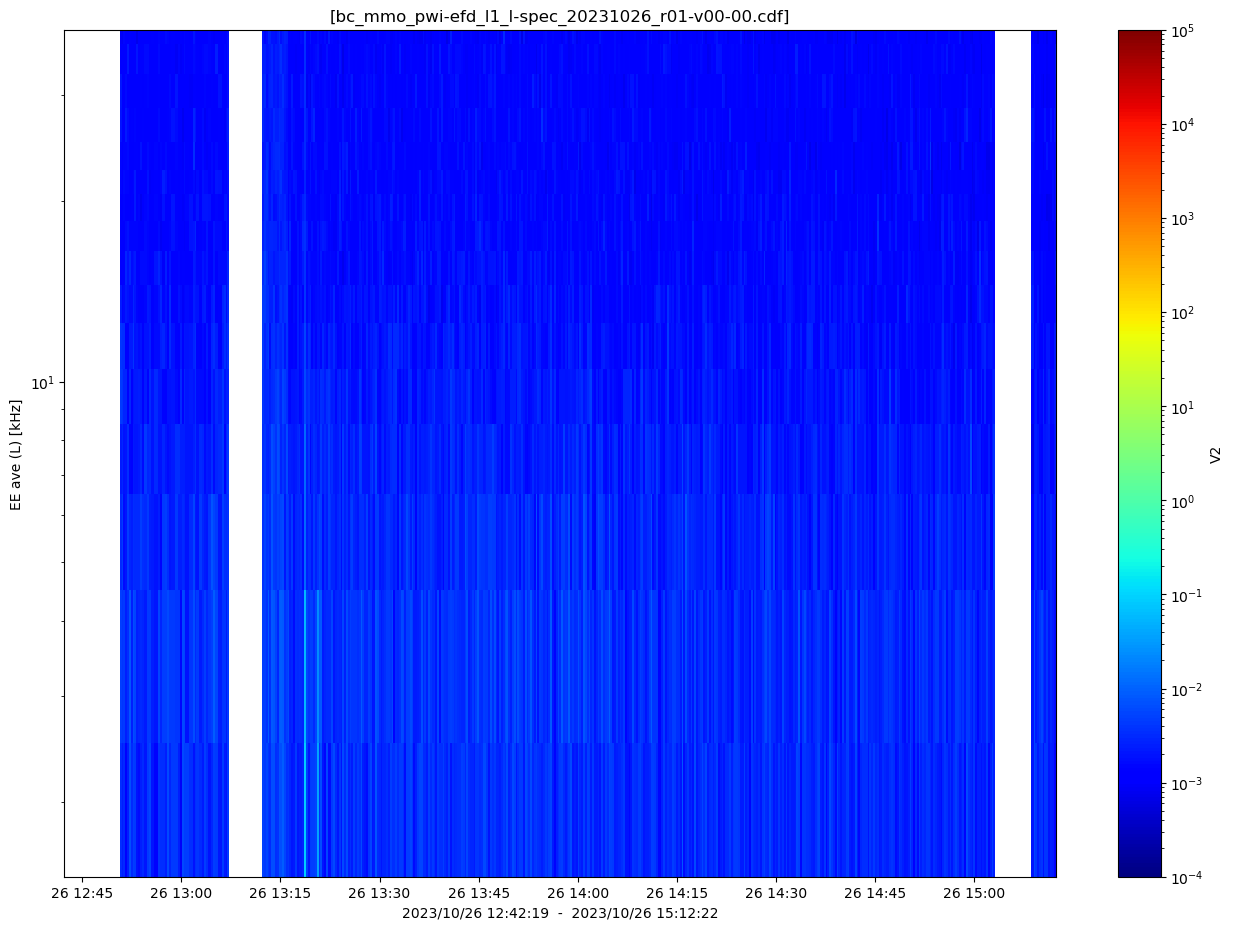

In [40]:
n0    = 0;              n1     = n_time0
# n0    = n_time0//10;    n1     = n_time0//6
p_min = p_min0;  p_max = p_max0
f_min = f_min0;  f_max = f_max0
num_1d = np.arange(n_time0)

fig2d = plt.figure(figsize=[16,11])
if time_mode == 1:
    ax1 = fig2d.add_subplot(2, 1, 1);  ax2 = fig2d.add_subplot(2, 1, 2);  ax2.set_xlabel(str_date)
else:
    ax1 = fig2d.add_subplot(1, 1, 1);                                     ax1.set_xlabel(str_date)
ax1.set_ylim(f_min, f_max)
if f_mode == 1:
    ax1.set_yscale('log')
ax1.set_ylabel(str_EE + ' [kHz]');  ax1.set_title("[" + data_name + "]")

if time_mode == 1:
    p1 = ax1.pcolormesh(num_1d,   freq_1d, EE_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
    p2 = ax2.plot(np.ravel(data.epoch[:]), '.')
    pp2 = fig2d.colorbar(p1, ax=ax2, orientation="vertical"); pp2.set_label(spec.str_unit)
else:
    p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EE_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical");  pp1.set_label(spec.str_unit)

print( "(", num_1d[0],")", Epoch_1d[0], "-", "(", num_1d[-1],")", Epoch_1d[-1] )
if time_mode == 1:
    xlim=[num_1d[n0], num_1d[n2-1]]
    ax2.set_xlim(xlim)
else:
    xlim=[Epoch_1d[n0], Epoch_1d[n1-1]]
    #E_min = '2024-08-21 04:00:00';  t_min = datetime.datetime.strptime(E_min, "%Y-%m-%d %H:%M:%S");  
    #E_max = '2024-08-21 19:00:00';  t_max = datetime.datetime.strptime(E_max, "%Y-%m-%d %H:%M:%S");  xlim=[t_min, t_max]
ax1.set_xlim(xlim)

plt.subplots_adjust(hspace=0.02);  plt.show()
if dump_mode > 0:
    png_fname = work_dir+data_name+'_FT2.png'
    if f_mode == 1:
        png_fname = work_dir+data_name+'_FT2-log.png'
    fig2d.savefig(png_fname)